# SVM classifiers

In this section of the tutorial, we will investigate the use of SVM classifiers in `sklearn`. As for all models in the `sklearn` framework, Support Vector Machines mainly rely on `fit(X, y)` and `predict(X)` methods. Once fitted, support vectors are stored in the `support_vectors_` attribute and their coefficients can be found in `dual_coef_`.

More information about the use of Support Vector Machines for Classification in `sklearn` can be found at: <http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html>.

To begin with, let us import libraries we need and define a function to plot a fitted SVM in 2D.

In [1]:
%matplotlib inline

from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np

def plot_decision(clf, X, y):
    # Build a 2D grid and perform classification using clf on this grid
    xx, yy = np.meshgrid(np.arange(X[:,0].min() - .5, X[:,0].max() + .5, .01),
                         np.arange(X[:,1].min() - .5, X[:,1].max() + .5, .01))
    zz_dec = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    zz_class = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, zz_class, alpha=.2)
    plt.contour(xx, yy, zz_dec, color="k", linestyles="dashed", levels=[-1, 1])
    # Plot data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors="none")
    # Draw a circle around support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors="none")
    # Set figure coordinate limits
    plt.xlim(X[:,0].min() - .5, X[:,0].max() + .5)
    plt.ylim(X[:,1].min() - .5, X[:,1].max() + .5)

Then, we load some data that are linearly separable.

In [2]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=.6, random_state=0)

We can then try to fit a linear SVM on this data and observe what we get:

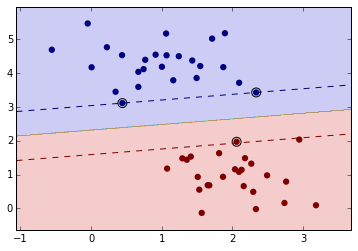

In [3]:
clf = SVC(kernel="linear")
clf.fit(X, y)
plot_decision(clf, X, y)

As expected, the learned boundary is a straight line and allows perfect separation between classes. Three support vectors are selected.

Let us now try with a slightly more difficult problem (with more intra-cluster variance).

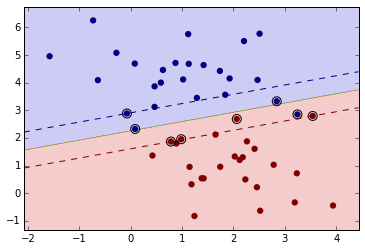

In [4]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1., random_state=0)
clf = SVC(kernel="linear")
clf.fit(X, y)
plot_decision(clf, X, y)

As can be seen, the problem is no longer linearly separable and more support vectors are kept.
If we now want to assess performance of our classifier, we can have a look at the fraction of correctly classified samples (of course, we should do this on a test set, but we will consider these questions that later in the tutorial):

In [5]:
y_predicted = clf.predict(X)
print("Number of correctly classified instances: %d out of %d" % (np.sum(y_predicted == y), len(y)))

Number of correctly classified instances: 49 out of 50


We then turn our focus to a new dataset:

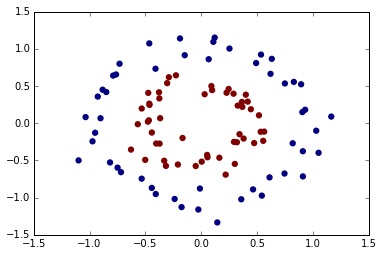

In [6]:
X, y = make_circles(n_samples=100, random_state=0, noise=.1, factor=.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors="none")

For this data, a linear kernel would no longer be a good pick. We then build a RBF kernel Support Vector Classifier and fit it to the data:

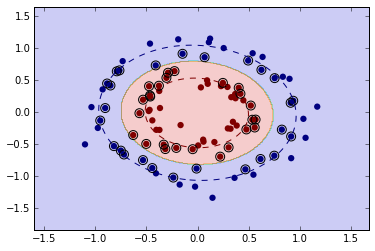

In [7]:
clf = SVC(kernel="rbf")
clf.fit(X, y)
plot_decision(clf, X, y)

The number of selected support vectors is much larger in this case. We can try to vary parameter $C$ of the SVM and observe its impact on the number of selected support vectors:

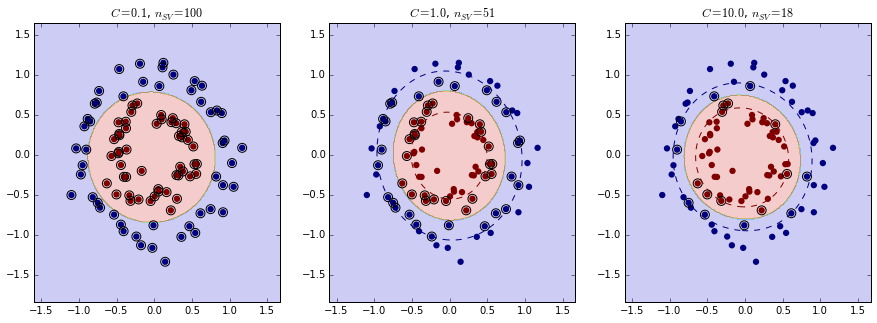

In [8]:
plt.figure(figsize=(15, 5))
for i, C in enumerate([.1, 1., 10.]):
    plt.subplot(1, 3, i + 1)
    clf = SVC(kernel="rbf", C=C)
    clf.fit(X, y)
    plot_decision(clf, X, y)
    plt.title("$C=%.1f$, $n_{SV}=%d$" % (C, np.sum(clf.n_support_)))